<a href="https://colab.research.google.com/github/Umeshika97/Breast-Cancer-Detection-Using-Machine-Learning-Random-Forest-/blob/main/s14320_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Detection Using Machine Learning Random Forest**

**Import Libraries**

In [ ]:
#import libraries 
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

**Attribute Information:**

Age (years) 

BMI (kg/m2) 

Glucose (mg/dL) 

Insulin (µU/mL) 

HOMA Leptin (ng/mL) 

Adiponectin (µg/mL) 

Resistin (ng/mL) 

MCP-1(pg/dL)

Classification Labels: 
        
        1=Healthy controls 

        2=Patients

# Import Dataset

In [ ]:
import pandas as pd
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.xlsx')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
#Number of rows and columns are counted in the data set
df.shape

(116, 10)

In [ ]:
#Count the empty and The missing value was dropped
df.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [ ]:
#A count of the number of Healthy controls  & Patients are taken by using value_counts()
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

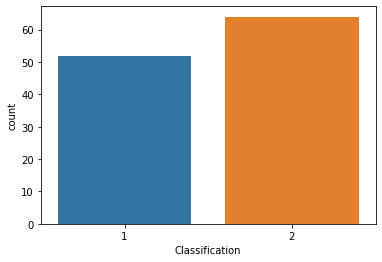

In [ ]:
#The count is Visualized using bar graph
sns.countplot(df['Classification'],label="Count")

In [ ]:
#The data types are checked
df.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

**A pair plot is created**

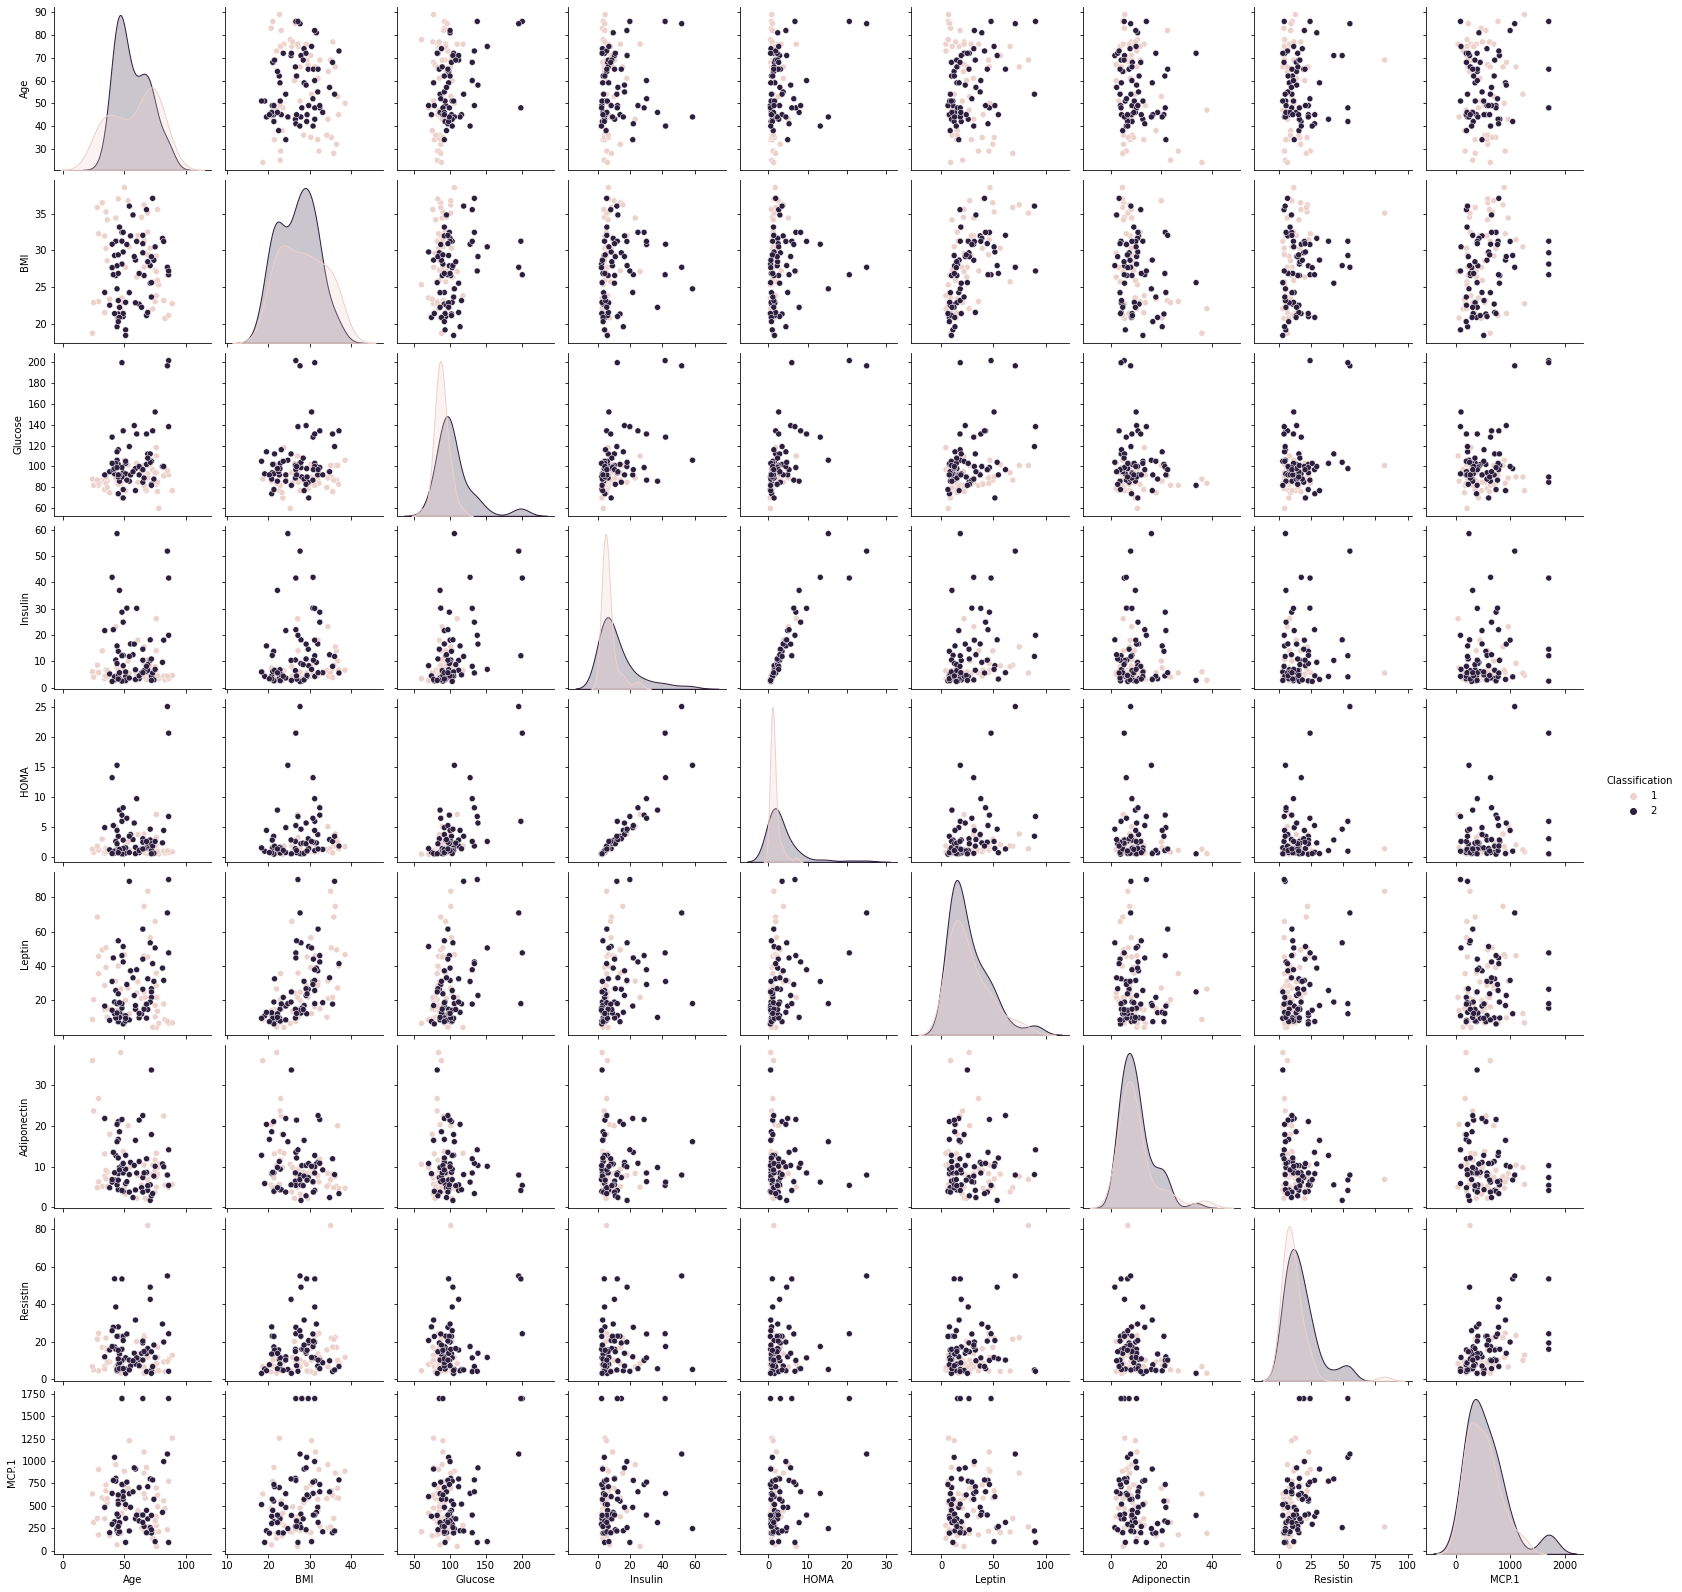

In [ ]:
sns.pairplot(df, hue="Classification")

In [ ]:
#The correlation of the columns are taken
df.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


 **The correlation is Visualized by using creating a heat map.**

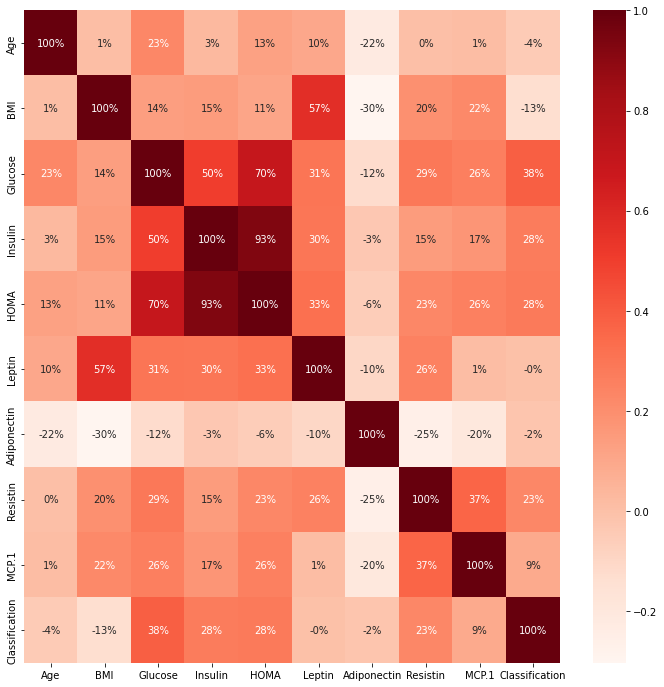

In [ ]:
plt.figure(figsize=(12,12))  
sns.heatmap(df.corr(), cbar=True, annot=True, cmap="Reds", fmt='.0%')

**Define X and Y**

In [ ]:
X = df.drop('Classification',axis=1).values
Y = df['Classification'].values

**Split the dataset in training set and test set**
 
 85% training data and 15% testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)
print(X_train)


[[3.80000000e+01 2.24996371e+01 9.50000000e+01 5.26100000e+00
  1.23282767e+00 8.43800000e+00 4.77192000e+00 1.57360600e+01
  1.99055000e+02]
 [4.20000000e+01 2.13599146e+01 9.30000000e+01 2.99900000e+00
  6.87970600e-01 1.90826000e+01 8.46291500e+00 1.73761500e+01
  3.21919000e+02]
 [4.70000000e+01 2.20300000e+01 8.40000000e+01 2.86900000e+00
  5.90000000e-01 2.66500000e+01 3.80400000e+01 3.32000000e+00
  1.91720000e+02]
 [2.40000000e+01 1.86700000e+01 8.80000000e+01 6.10700000e+00
  1.33000000e+00 8.88000000e+00 3.60600000e+01 6.85000000e+00
  6.32220000e+02]
 [5.00000000e+01 3.85787585e+01 1.06000000e+02 6.70300000e+00
  1.75261107e+00 4.66401000e+01 4.66764500e+00 1.17838800e+01
  8.87160000e+02]
 [4.80000000e+01 2.81250000e+01 9.00000000e+01 2.54000000e+00
  5.63880000e-01 1.55325000e+01 1.02223100e+01 1.61103200e+01
  1.69844000e+03]
 [4.40000000e+01 2.47400000e+01 1.06000000e+02 5.84600000e+01
  1.52853413e+01 1.81600000e+01 1.61000000e+01 5.31000000e+00
  2.44750000e+02]
 [4.00

**Train the model on the training set with Standard Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-1.20689670e+00 -9.94686239e-01 -9.78757991e-02 -4.53353220e-01
  -3.81380851e-01 -9.71966938e-01 -7.76328764e-01  9.80782301e-02
  -9.50496843e-01]
 [-9.56444870e-01 -1.21896139e+00 -1.92844396e-01 -7.09073423e-01
  -5.55342801e-01 -4.20423909e-01 -2.58474414e-01  2.29530808e-01
  -5.80548878e-01]
 [-6.43380083e-01 -1.08710166e+00 -6.20203083e-01 -7.23769986e-01
  -5.86622852e-01 -2.83239972e-02  3.89125272e+00 -8.97064166e-01
  -9.72582794e-01]
 [-2.08347810e+00 -1.74828408e+00 -4.30265889e-01 -3.57712507e-01
  -3.50355671e-01 -9.49064996e-01  3.61345456e+00 -6.14136034e-01
   3.53778700e-01]
 [-4.55541211e-01  2.16937107e+00  4.24451485e-01 -2.90334417e-01
  -2.15424421e-01  1.00745004e+00 -7.90958765e-01 -2.18687465e-01
   1.12141230e+00]
 [-5.80767125e-01  1.12275397e-01 -3.35297292e-01 -7.60963597e-01
  -5.94962445e-01 -6.04370033e-01 -1.16276010e-02  1.28075024e-01
   3.56420583e+00]
 [-8.31218955e-01 -5.53826543e-01  4.24451485e-01  5.56081967e+00
   4.10530534e+00 -4.6822782

# **The special function is defined to hold many different models that is named classification_function**

In [ ]:
def classification_function(X_train,Y_train):
  #The DecisionTreeClassifier is calculated
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #The Random Forest Classification algorithm is calculated by using RandomForestClassifier method 
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #The model accuracy on the training data are taken
  print('[0]Decision Tree Classifier Training Percentage of Accuracy:', tree.score(X_train, Y_train)*100,'%')
  print('[1]Random Forest Classifier Training Percentage of Accuracy:', forest.score(X_train, Y_train)*100,'%')
  
  return tree, forest


In [ ]:
Resluts = classification_function(X_train,Y_train)

[0]Decision Tree Classifier Training Percentage of Accuracy: 100.0 %
[1]Random Forest Classifier Training Percentage of Accuracy: 97.95918367346938 %


[[6 2]
 [4 6]]
Model[0] Testing Accuracy  = 0.6666666666666666
Model[0] Testing Precision = 0.75
Model[0] Testing Recall    = 0.6

[[6 2]
 [2 8]]
Model[1] Testing Accuracy  = 0.7777777777777778
Model[1] Testing Precision = 0.8
Model[1] Testing Recall    = 0.8



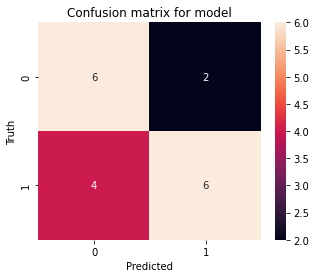

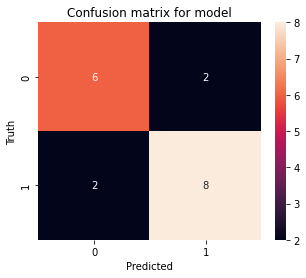

In [ ]:
from sklearn.metrics import confusion_matrix
for i in range(len(Resluts)):

  cm = confusion_matrix(Y_test, Resluts[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  plt.figure(figsize=(5,4))
  sns.heatmap(cm,annot=True)
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  plt.title("Confusion matrix for model")
  

  print(cm)
  print('Model[{}] Testing Accuracy  = {}'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print('Model[{}] Testing Precision = {}'.format(i,  TP / (TP + FP)))
  print('Model[{}] Testing Recall    = {}'.format(i,  TP  / (TP + FN)))
  print()# Print a new line
  

In [ ]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(Resluts)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, Resluts[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, Resluts[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           1       0.60      0.75      0.67         8
           2       0.75      0.60      0.67        10

    accuracy                           0.67        18
   macro avg       0.68      0.68      0.67        18
weighted avg       0.68      0.67      0.67        18

0.6666666666666666

Model  1
              precision    recall  f1-score   support

           1       0.75      0.75      0.75         8
           2       0.80      0.80      0.80        10

    accuracy                           0.78        18
   macro avg       0.78      0.78      0.78        18
weighted avg       0.78      0.78      0.78        18

0.7777777777777778



In [ ]:
#The Prediction of Random Forest Classifier model 
pred = Resluts[1].predict(X_test)
print(pred)

#Print a Blank
print()

#The actual values
print(Y_test)

[1 2 1 1 2 2 2 2 1 2 1 1 2 1 2 2 1 2]

[1 2 2 1 1 2 2 2 2 2 1 1 2 1 1 2 1 2]
